In [ ]:
#Proyecto en Python para visualizar un dataset de visualizaciones de una página cada día en el foro de freeCodeCamp.org del 2016-05-09 al 2019-12-03
#Se requiere crear los siguientes gráficos:
#Gráfico de línea que mida las visitas diarias de la página del foro de freeCodeCamp de mayo de 2016 a diciembre 2019
#Gráfico de barras mostrando el promedio de vistas diarias para cada mes agrupados por año
#Gráfico de caja que muestre la distribución de valores en un año dado o en un mes y cómo se comporta en el tiempo

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df = pd.read_csv(r"C:\Users\PC\Downloads\fcc-forum-pageviews.csv",parse_dates=[0],index_col=[0])

In [25]:
#Limpia la información eliminando el 2.5% de los datos de cada extremo
df = df[(df["value"]>=df["value"].quantile(0.025))&
(df["value"]<=df["value"].quantile(0.975))]

Text(0.5, 1.0, 'Visitas diarias al foro de freeCodeCamp del 5/2016 a 12/2019.')

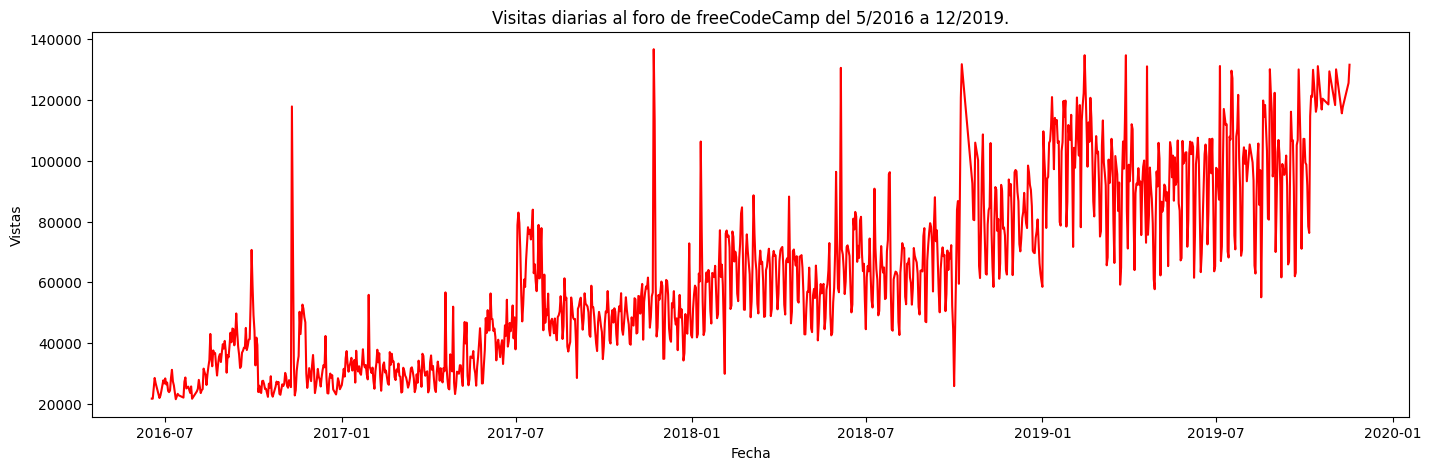

In [26]:
#Gráfico lineal
fig, ax = plt.subplots(figsize=(17,5))
ax.plot(df["value"],color="red")
ax.set_xlabel("Fecha")
ax.set_ylabel("Vistas")
ax.set_title("Visitas diarias al foro de freeCodeCamp del 5/2016 a 12/2019.")

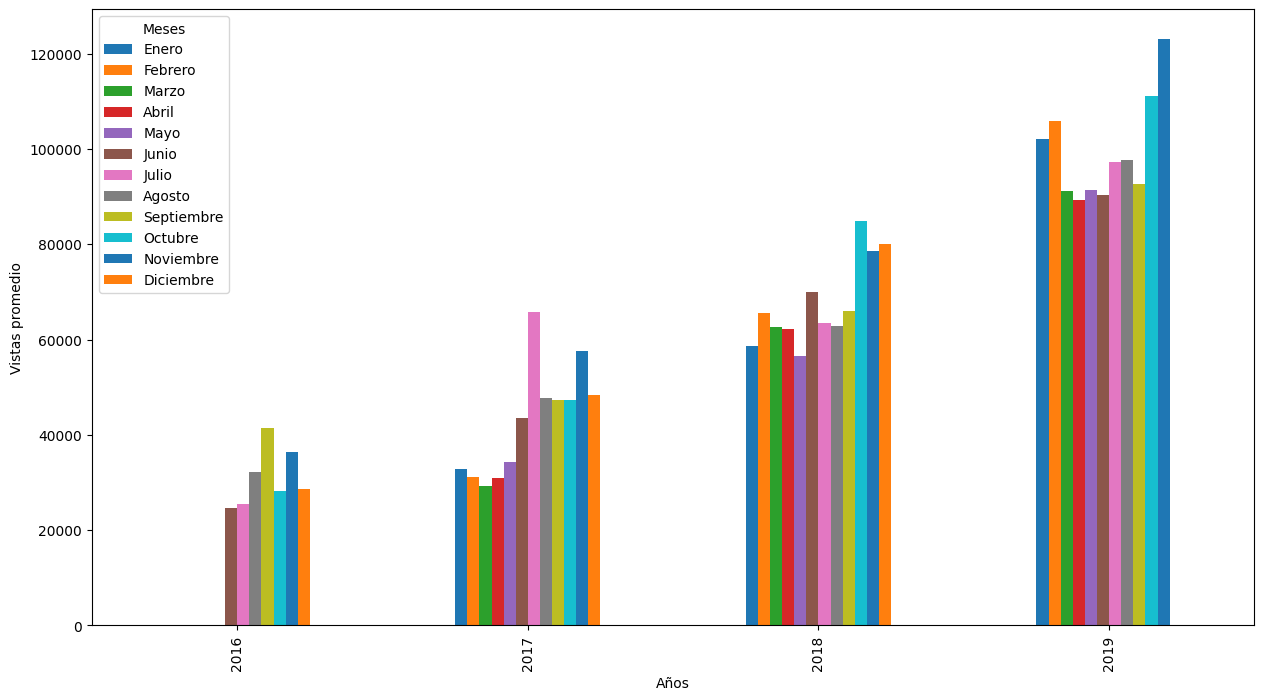

In [27]:
#Gráfico de barra
#Copiar y modificar la información para el gráfico mensual 
df_bar = df.copy()
df_bar["month"] = df.index.month
df_bar["year"] = df.index.year

df_bar = df_bar.groupby(["year", "month"])["value"].mean().unstack()

df_bar.columns = [
    "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
    "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
]
fig = df_bar.plot(kind="bar", figsize=(15, 8)).figure

plt.xlabel("Años")
plt.ylabel("Vistas promedio")
plt.legend(title="Meses", loc="upper left")
plt.show()

Text(0, 0.5, 'Vistas')

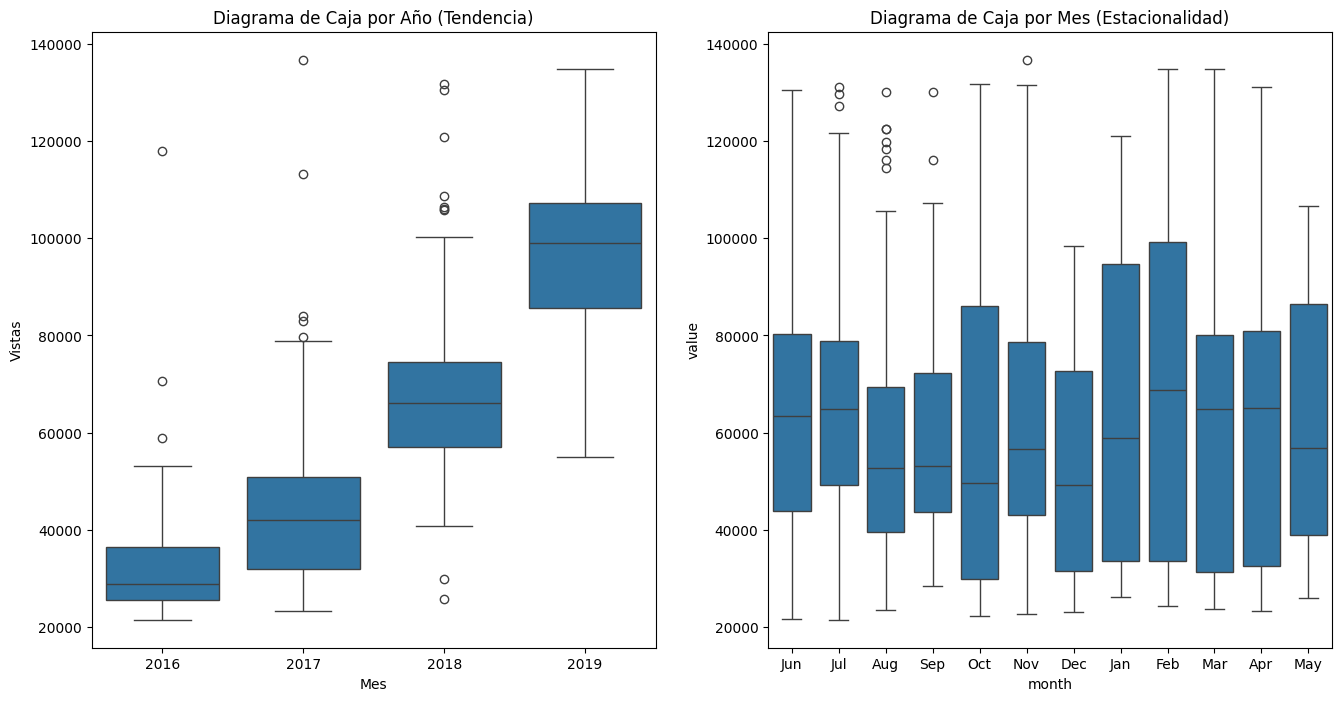

In [28]:
#Gráfico de caja
#Preparar los datos para el gráfico
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(16,8))
sns.boxplot(ax=ax1, x="year",y="value", data=df_box)
ax1.set_title("Diagrama de Caja por Año (Tendencia)")
ax1.set_xlabel("Año")
ax1.set_ylabel("Vistas")

sns.boxplot(ax=ax2, x="month",y="value", data=df_box)
ax2.set_title("Diagrama de Caja por Mes (Estacionalidad)")
ax1.set_xlabel("Mes")
ax1.set_ylabel("Vistas")